In [1]:
%matplotlib inline

import numpy
import pandas
import geopandas
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
db = pandas.read_csv("dftRoadSafetyData_Accidents_2018geom.csv")

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               122635 non-null  object 
 1   Location_Easting_OSGR                        122580 non-null  float64
 2   Location_Northing_OSGR                       122580 non-null  float64
 3   Longitude                                    122580 non-null  float64
 4   Latitude                                     122580 non-null  float64
 5   Police_Force                                 122635 non-null  int64  
 6   Accident_Severity                            122635 non-null  int64  
 7   Number_of_Vehicles                           122635 non-null  int64  
 8   Number_of_Casualties                         122635 non-null  int64  
 9   Date                                         122635 non-nul

In [4]:
db.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            55
Location_Northing_OSGR                           55
Longitude                                        55
Latitude                                         55
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             13
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [5]:
db3 = db.dropna(subset=['Longitude', 'Latitude'])
#for col in db3.columns:
    #db3 = (db3[db3[col]!=-1])
db3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122580 entries, 0 to 122634
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               122580 non-null  object 
 1   Location_Easting_OSGR                        122580 non-null  float64
 2   Location_Northing_OSGR                       122580 non-null  float64
 3   Longitude                                    122580 non-null  float64
 4   Latitude                                     122580 non-null  float64
 5   Police_Force                                 122580 non-null  int64  
 6   Accident_Severity                            122580 non-null  int64  
 7   Number_of_Vehicles                           122580 non-null  int64  
 8   Number_of_Casualties                         122580 non-null  int64  
 9   Date                                         122580 non-nul

In [6]:
db3.duplicated().sum()

0

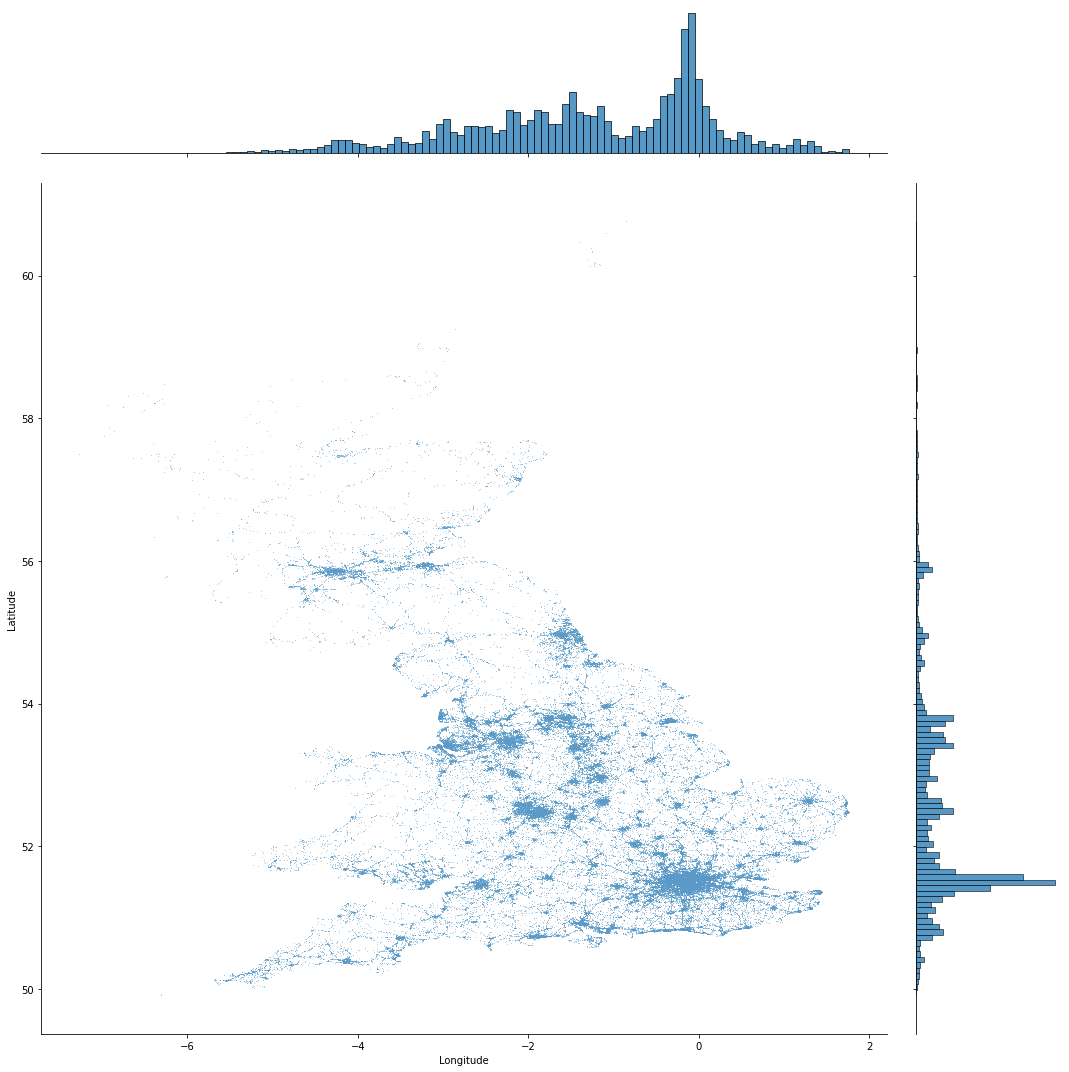

In [7]:
# Generate scatter plot
seaborn.jointplot(x='Longitude', y='Latitude', data=db3, s=0.5, height=15);


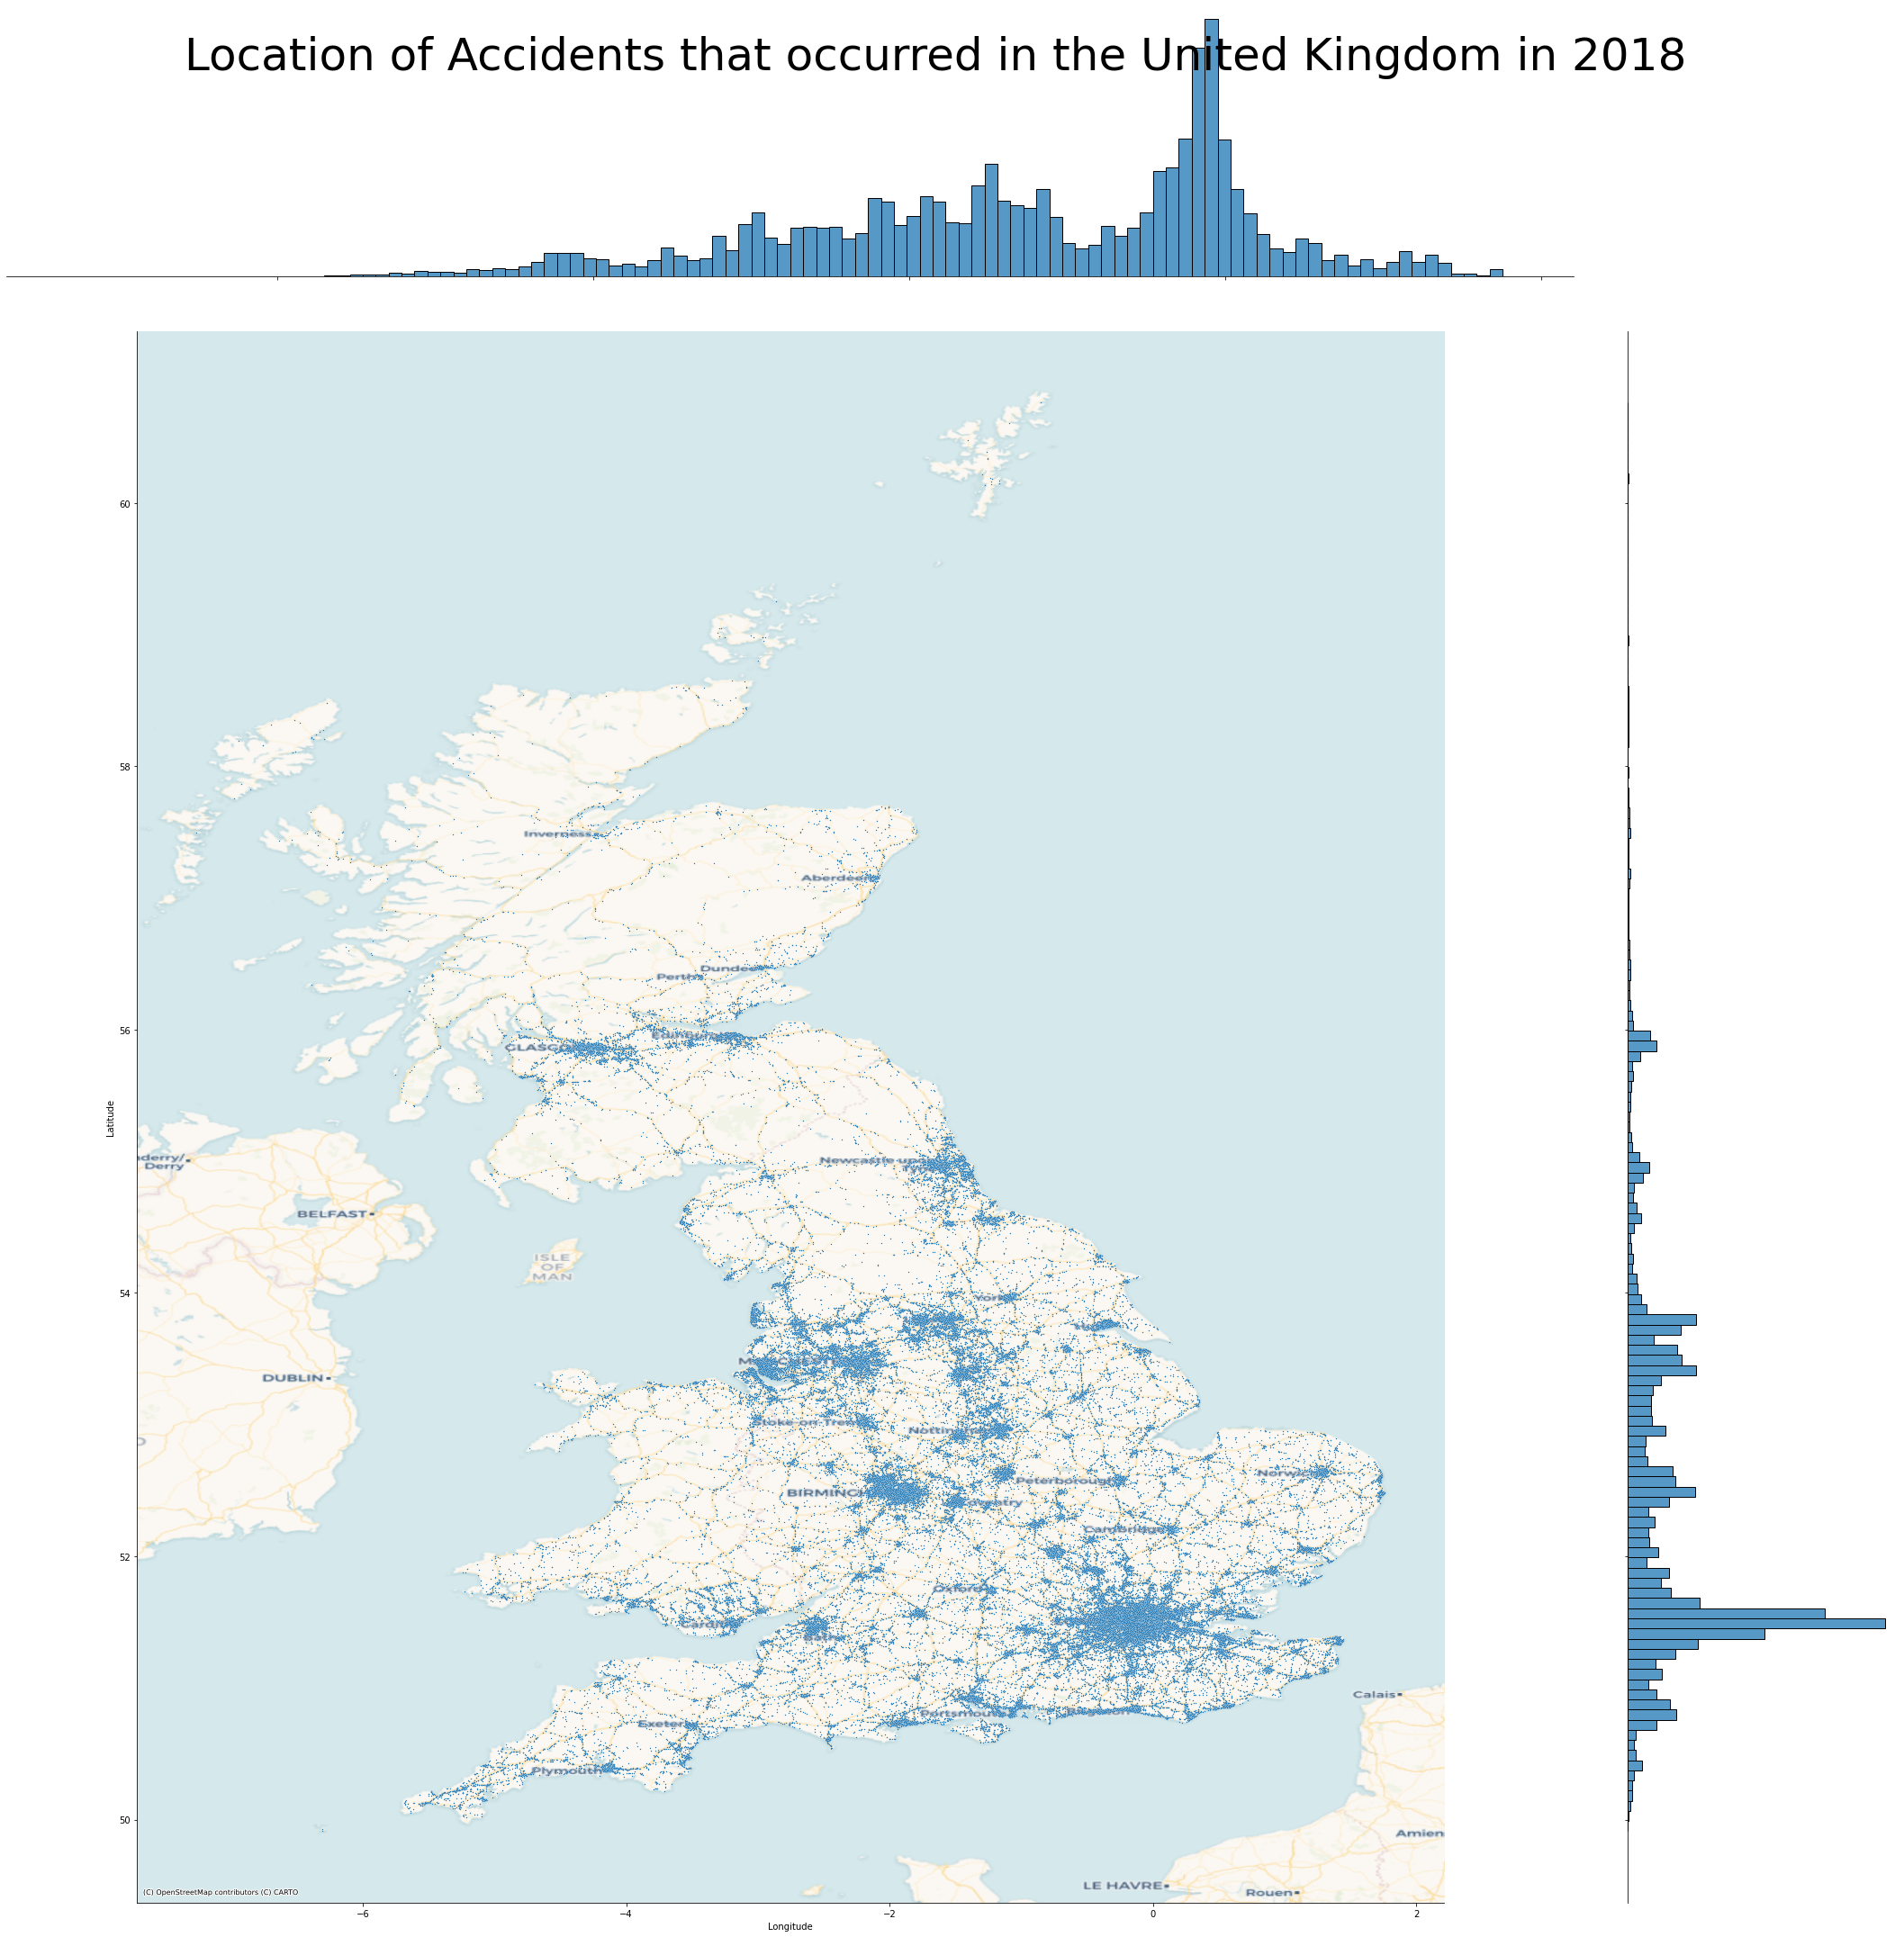

In [8]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='Longitude', y='Latitude', data=db3, s=2.0, height=30
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.Voyager
);
joint_axes.fig.suptitle('Location of Accidents that occurred in the United Kingdom in 2018', fontsize = 50)
#plt.title('Location of Accidents that occurred in the United Kingdom in 2018')
plt.savefig('map_positron1.jpeg')

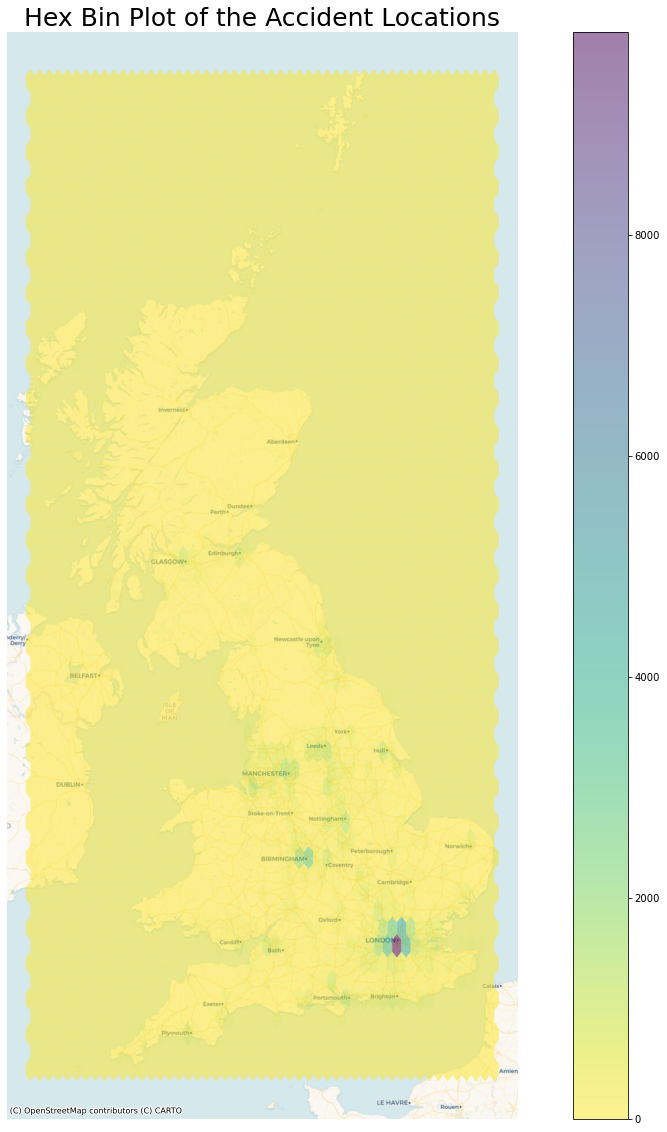

In [85]:
from matplotlib import cm, colors
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(20, 20))
# Generate and add hexbin with 100 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    db3['x'], 
    db3['y'],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Voyager
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()
plt.title('Hex Bin Plot of the Accident Locations', fontdict = {'fontsize' : 25})
plt.savefig('hex_bin_plot.jpeg')
#norm = colors.Normalize(db3.x_val.min(), db3.x_val.max())
#f.colorbar(cm.ScalarMappable(norm=norm,cmap='viridis_r'), ax=ax)

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


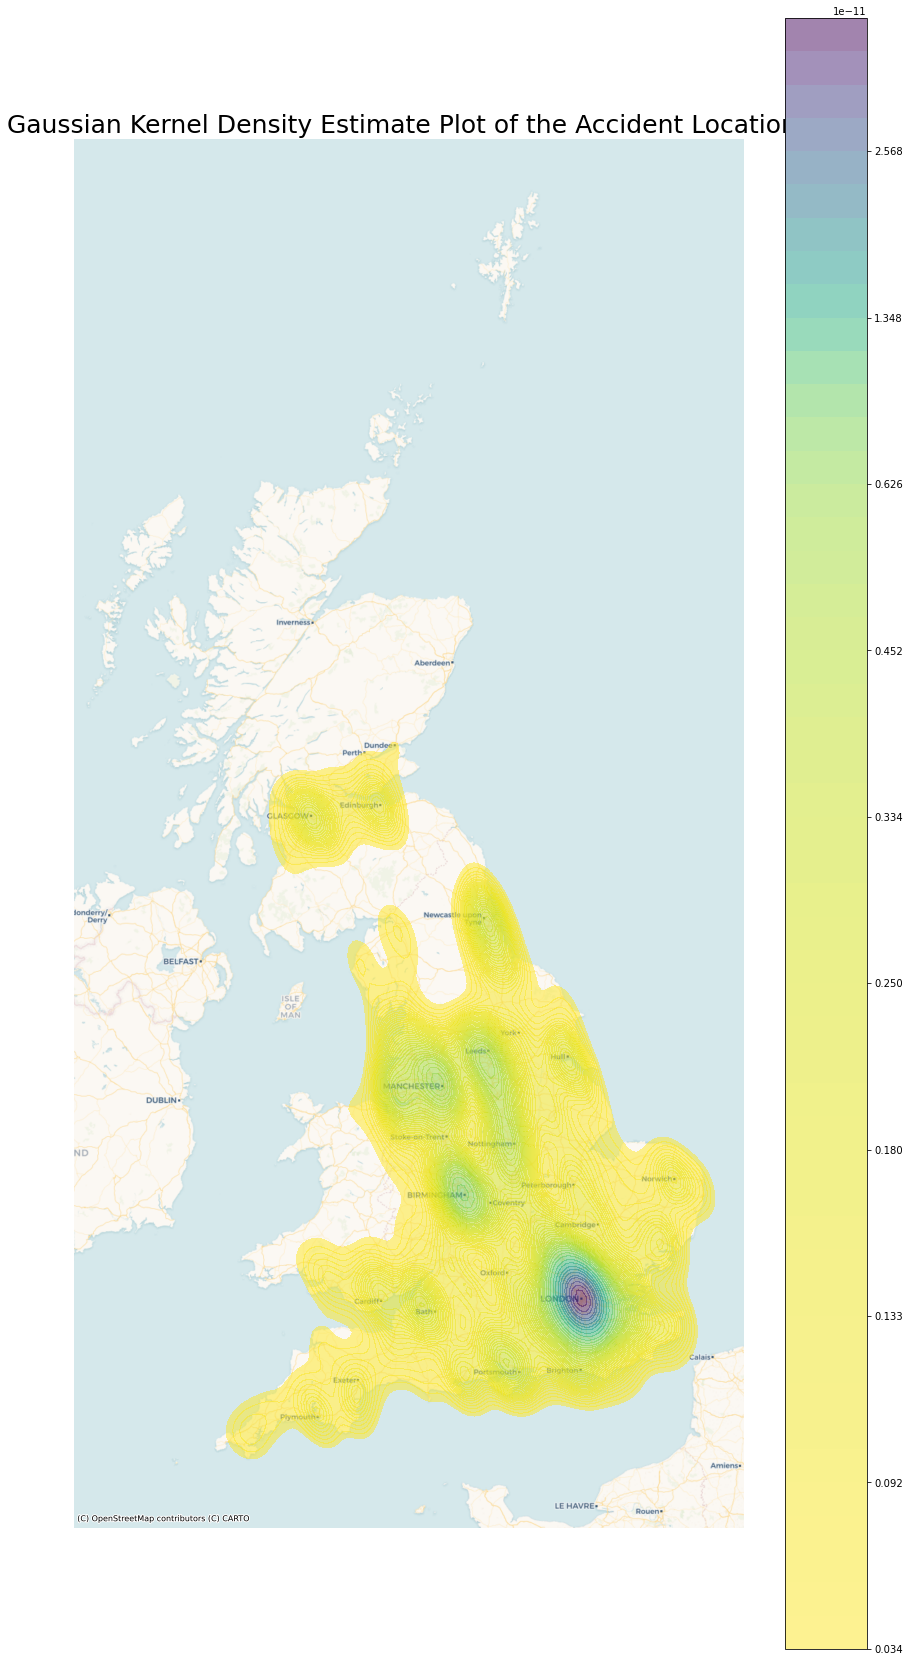

In [71]:
from matplotlib import cm, colors
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(15, 30))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
xx = seaborn.kdeplot(db3['x'], db3['y'], n_levels=50, shade=True, alpha=0.5, cmap='viridis_r', cbar=True, shade_lowest=False)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Voyager
)
# Remove axes
ax.set_axis_off()
# Add colorbar
#plt.colorbar(hb)
plt.title('Gaussian Kernel Density Estimate Plot of the Accident Locations', fontdict = {'fontsize' : 20})
plt.savefig('kde_plot.jpeg')

In [9]:
from pointpats import centrography, PointPattern

In [10]:
mean_center = centrography.mean_center(db3[['x', 'y']])
med_center = centrography.euclidean_median(db3[['x', 'y']])

print(mean_center, med_center)

[-140812.2993702 6882739.2074188] [-100405.50161182 6817488.3598463 ]


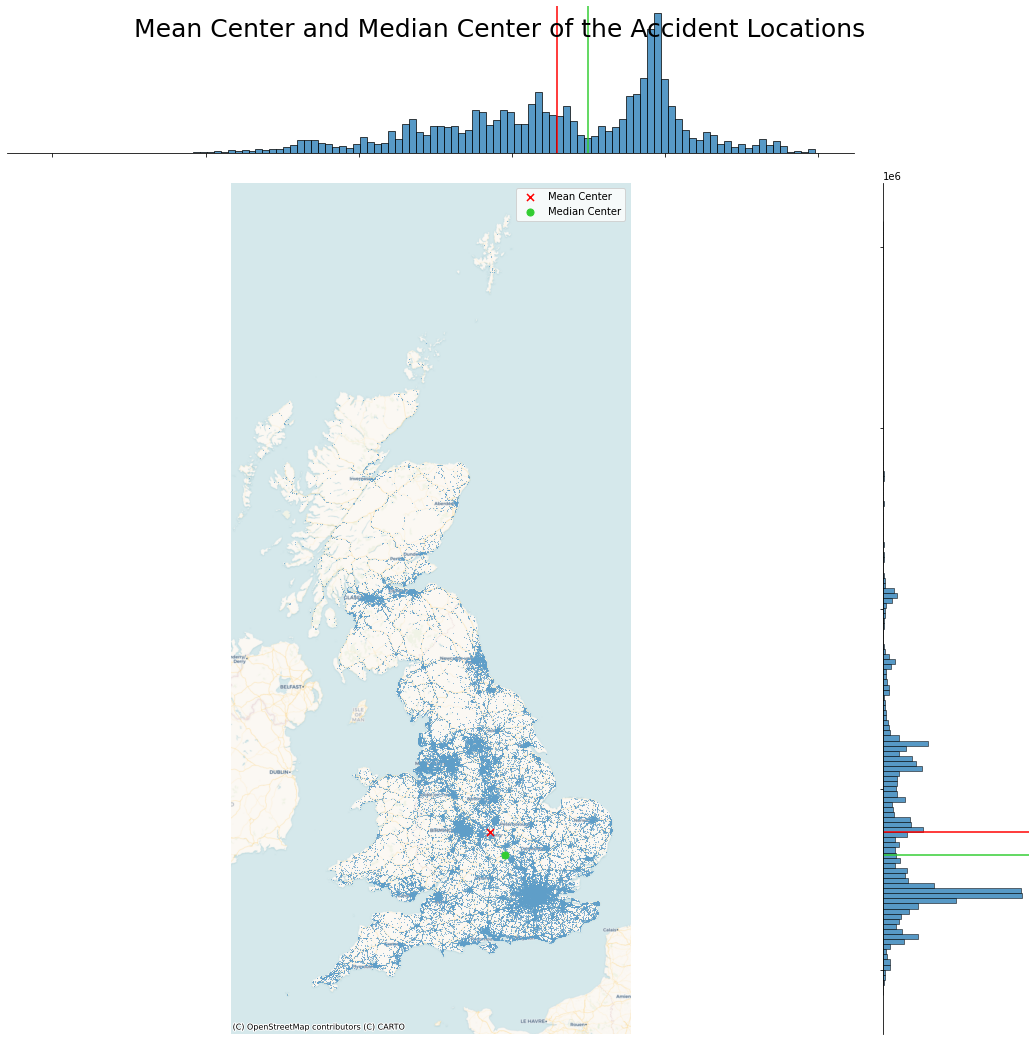

In [15]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='x', y='y', data=db3, s=0.75, height=15
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()
# Add basemap
contextily.add_basemap(
    joint_axes.ax_joint, 
    source=contextily.providers.CartoDB.Voyager
)
# Clean axes
joint_axes.ax_joint.set_axis_off()
#seaborn.set(rc={'figure.figsize':(11.7,15)})
# Display
joint_axes.fig.suptitle('Mean Center and Median Center of the Accident Locations', fontsize = 25)
#plt.title('Mean Center and Median Center of the Accident Locations', fontdict = {'fontsize' : 25})
plt.savefig('mean_median_centre.jpeg')
plt.show()

In [11]:
centrography.std_distance(db3[['x','y']])

299894.9938952672

In [14]:
major, minor, rotation = centrography.ellipse(db3[['x','y']])
theta_degree = numpy.degrees(rotation)
major, minor, theta_degree

(187421.5322041014, 313810.61498265347, -20.25947252415883)

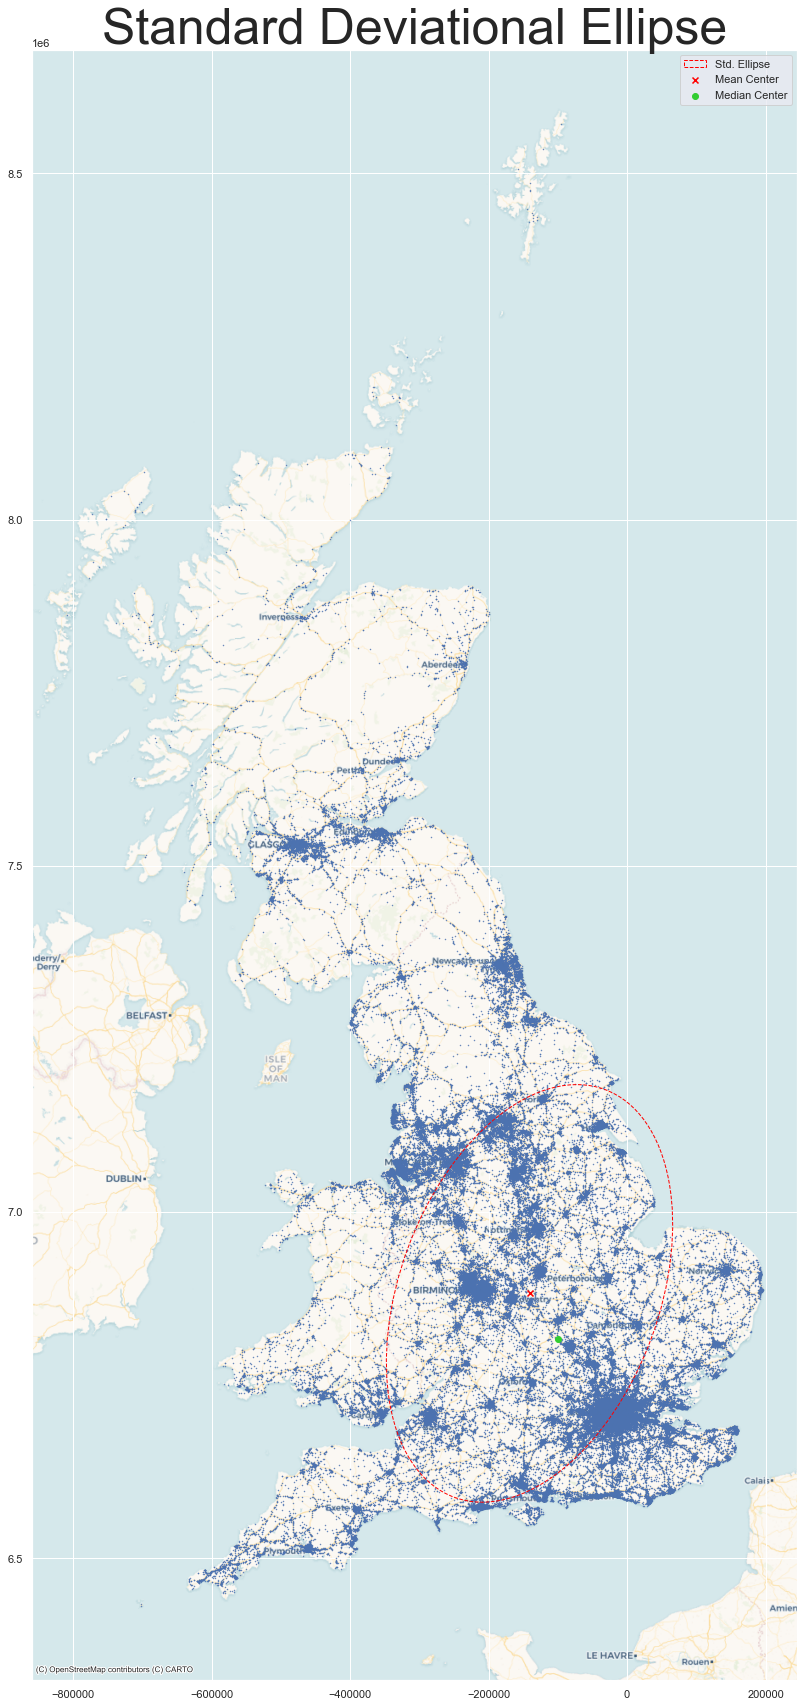

In [99]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(30, 30))
# Plot photograph points
ax.scatter(db3['x'], db3['y'], s=0.2)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Voyager
)
plt.title('Standard Deviational Ellipse', fontdict = {'fontsize' : 50})
plt.savefig('std_ellipse.jpeg')
plt.show()

In [100]:
# Narrow the analysis to only accidents that occurred in urban areas
user = db3.query('Urban_or_Rural_Area == 1')
user.info()
coordinates = user[['x','y']].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82583 entries, 0 to 122631
Data columns (total 34 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               82583 non-null  object 
 1   Location_Easting_OSGR                        82583 non-null  float64
 2   Location_Northing_OSGR                       82583 non-null  float64
 3   Longitude                                    82583 non-null  float64
 4   Latitude                                     82583 non-null  float64
 5   Police_Force                                 82583 non-null  int64  
 6   Accident_Severity                            82583 non-null  int64  
 7   Number_of_Vehicles                           82583 non-null  int64  
 8   Number_of_Casualties                         82583 non-null  int64  
 9   Date                                         82583 non-null  object 
 1

In [101]:
convex_hull_vertices = centrography.hull(coordinates)

In [102]:
import libpysal
alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinates, return_circles=True)

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\pygeos\io.py:76: UserWarning: The shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the PyGEOS GEOS version (3.9.1-CAPI-1.14.2). Conversions between both will be slow
  geos_version_string, geos_capi_version_string


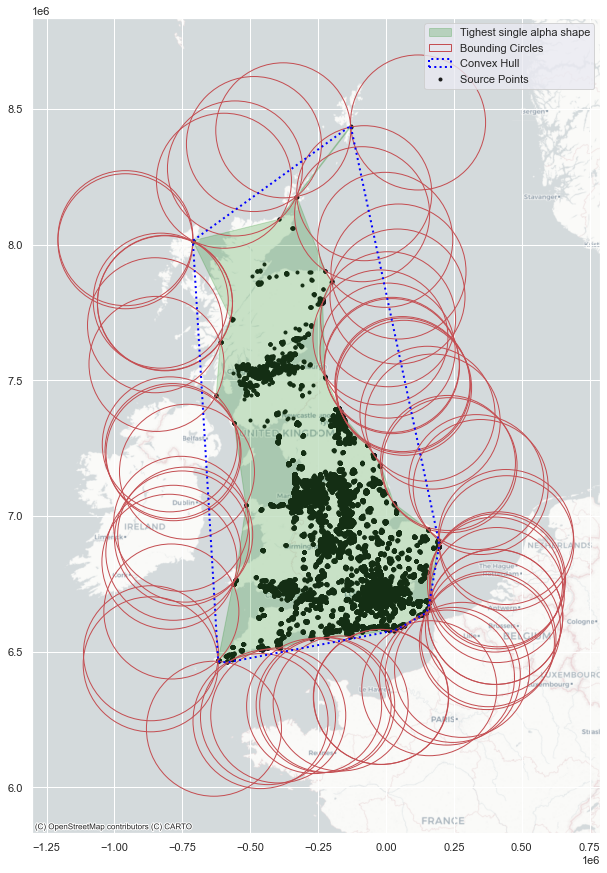

In [103]:
from descartes import PolygonPatch #to plot the alpha shape easily
f,ax = plt.subplots(1,1, figsize=(15,15))

# Plot a green alpha shape
ax.add_patch(
    PolygonPatch(
        alpha_shape, 
        edgecolor='green', 
        facecolor='green', 
        alpha=.2, 
        label = 'Tighest single alpha shape'
    )
)

# Include the points for our prolific user in black
ax.scatter(
    *coordinates.T, color='k', marker='.', label='Source Points'
)

# plot the circles forming the boundary of the alpha shape
for i, circle in enumerate(circs):
    # only label the first circle of its kind
    if i == 0:
        label = 'Bounding Circles'
    else:
        label = None
    ax.add_patch(
        plt.Circle(
            circle, 
            radius=alpha, 
            facecolor='none', 
            edgecolor='r', 
            label=label
        )
    )

# add a blue convex hull
ax.add_patch(
    plt.Polygon(
        convex_hull_vertices, 
        closed=True, 
        edgecolor='blue', 
        facecolor='none', 
        linestyle=':', 
        linewidth=2,
        label='Convex Hull'
    )
)

# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)

plt.legend();

In [104]:
min_rect_vertices = centrography.minimum_bounding_rectangle(coordinates)

In [105]:
(center_x, center_y), radius = centrography.minimum_bounding_circle(coordinates)

In [106]:
from matplotlib.patches import Polygon, Circle, Rectangle
from descartes import PolygonPatch

# Make a purple alpha shape
alpha_shape_patch = PolygonPatch(
    alpha_shape, 
    edgecolor='purple', 
    facecolor='none', 
    linewidth=2,
    label='Alpha Shape'
)

# a blue convex hull
convex_hull_patch = Polygon(
    convex_hull_vertices, 
    closed=True, 
    edgecolor='blue', facecolor='none', 
    linestyle=':', linewidth=2,
    label='Convex Hull'
)

# a green minimum rotated rectangle
"""
# Commented out until functionality is added to pointpats
min_rot_rect_patch = Polygon(
    min_rot_rect, 
    closed=True, 
    edgecolor='green', 
    facecolor='none', 
    linestyle='--', 
    label='Min Rotated Rectangle', 
    linewidth=2
)
"""

# compute the width and height of the 
min_rect_width = min_rect_vertices[2] - min_rect_vertices[0]
min_rect_height = min_rect_vertices[2] - min_rect_vertices[0]

# a goldenrod minimum bounding rectangle
min_rect_patch = Rectangle(
    min_rect_vertices[0:2], 
    width = min_rect_width,
    height = min_rect_height,
    edgecolor='goldenrod', facecolor='none', 
    linestyle='dashed', linewidth=2, 
    label='Min Bounding Rectangle', 
)

# and a red minimum bounding circle
circ_patch = Circle(
    (center_x, center_y), 
    radius=radius,
    edgecolor='red', 
    facecolor='none', 
    linewidth=2,
    label='Min Bounding Circle'
)

In [107]:
from pointpats import distance_statistics, QStatistic, random, PointPattern

In [108]:
random_pattern = random.poisson(coordinates, size=len(coordinates))

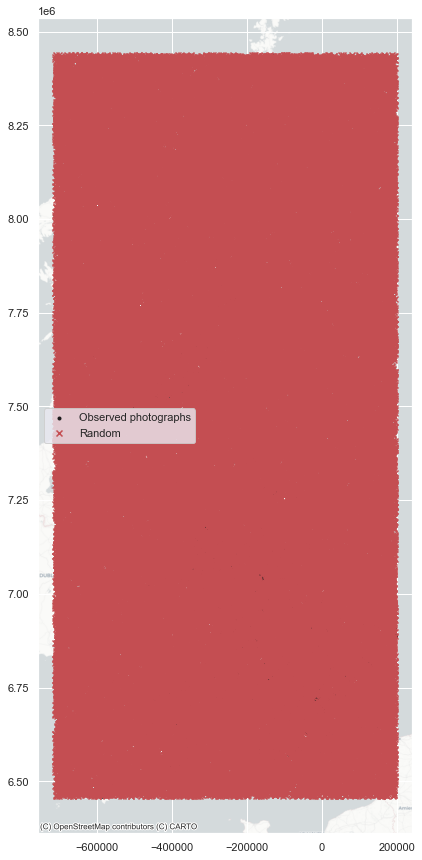

In [109]:
f,ax = plt.subplots(1, figsize=(15, 15))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed photographs')
plt.scatter(*random_pattern.T, color='r', marker='x', label='Random')
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

In [110]:
random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinates))

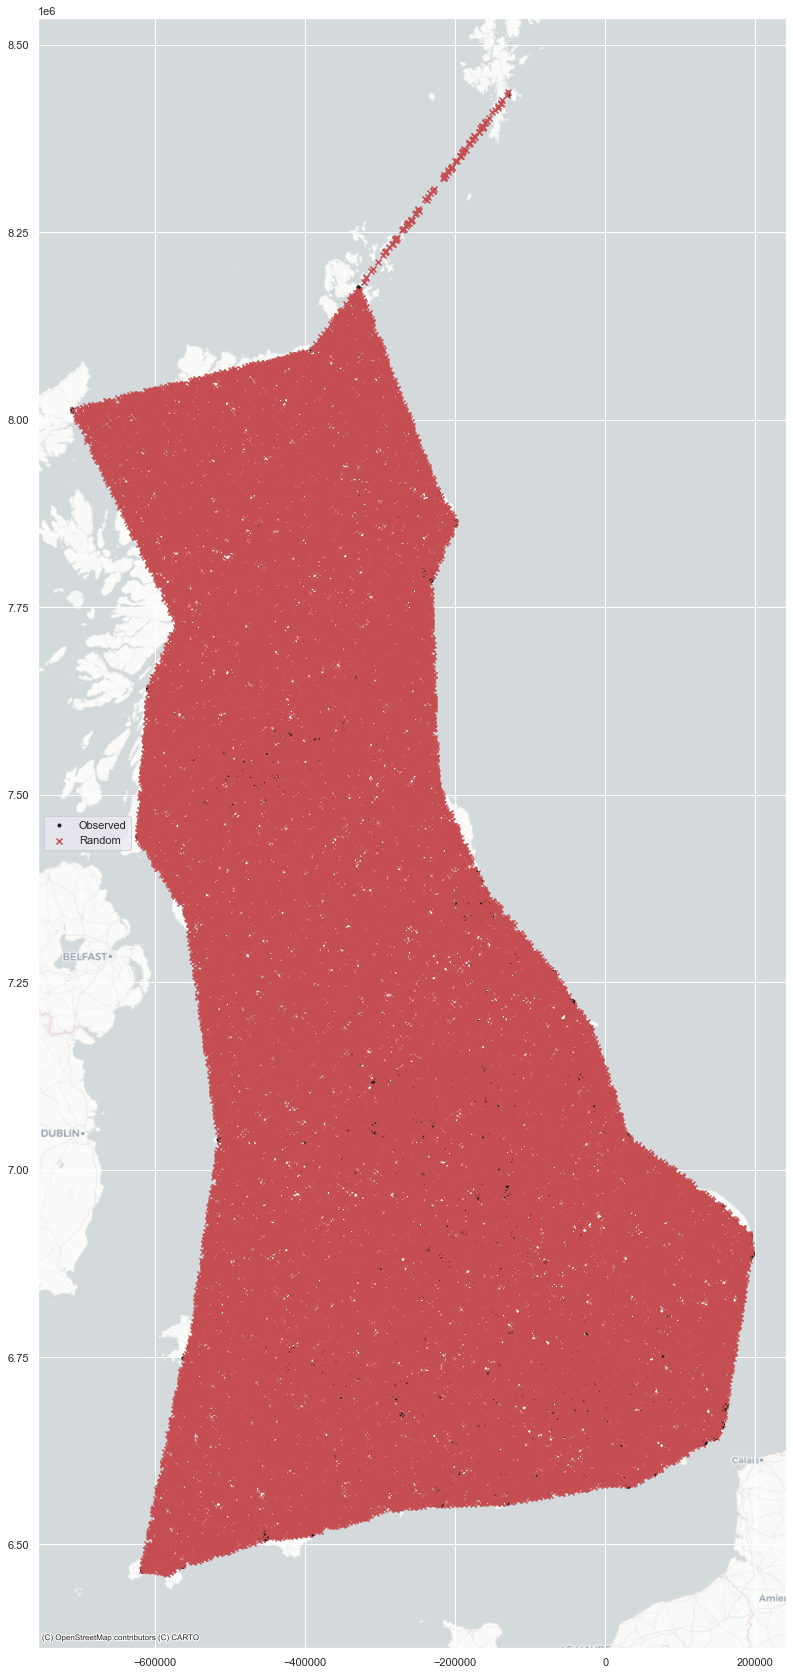

In [111]:
f,ax = plt.subplots(1, figsize=(30, 30))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Random')
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
ax.legend(ncol=1, loc='center left')
plt.show()

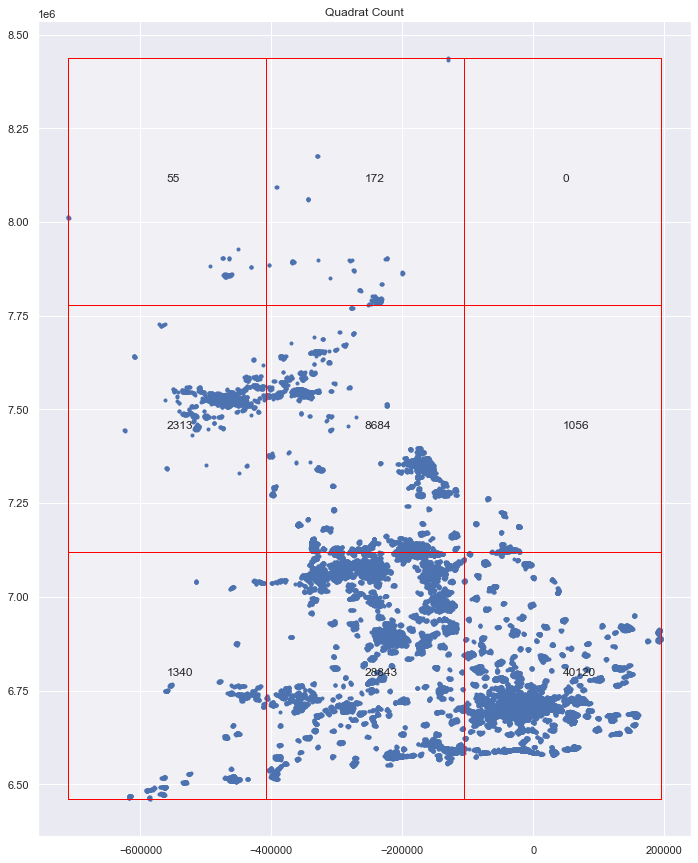

<Figure size 842.4x1080 with 0 Axes>

In [120]:
qstat = QStatistic(coordinates)
qstat.plot()

In [121]:
qstat.chi2

192620.66141942044

In [122]:
qstat.chi2_pvalue

0.0

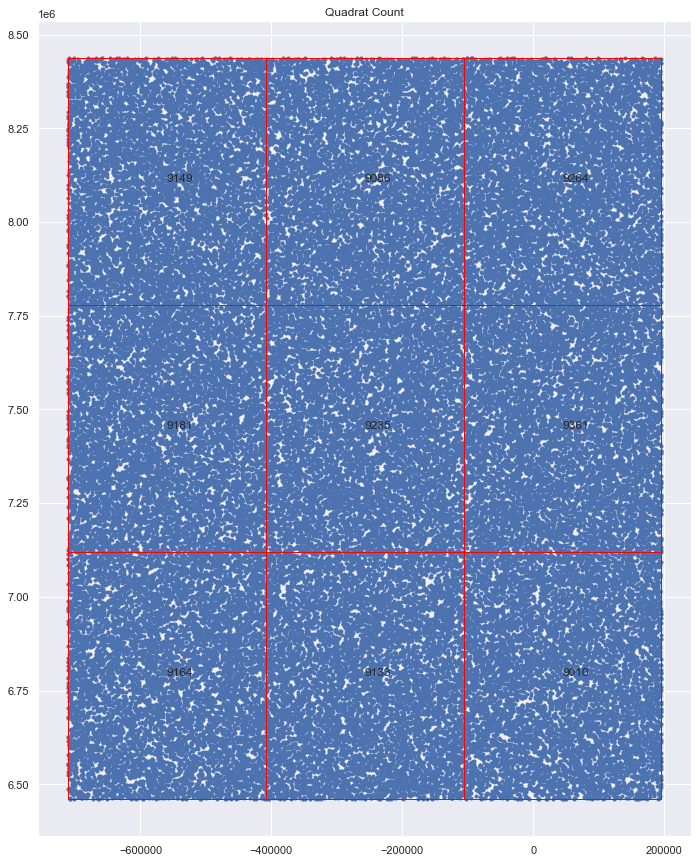

In [114]:
qstat_null = QStatistic(random_pattern)
qstat_null.plot()

In [115]:
qstat_null.chi2_pvalue

0.33075613615358074

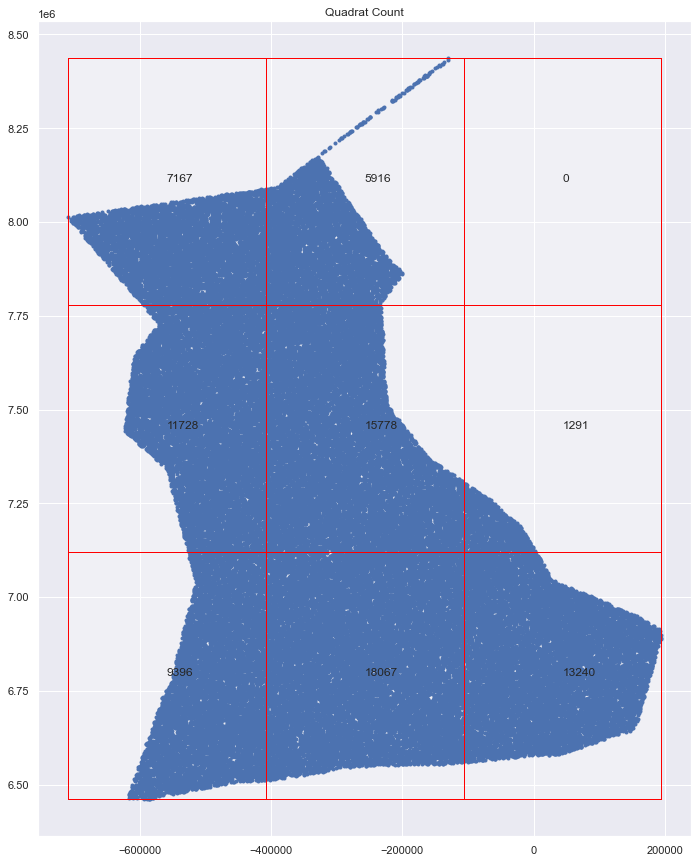

In [123]:
qstat_null_ashape = QStatistic(random_pattern_ashape)
qstat_null_ashape.plot()

In [125]:
qstat_null_ashape.chi2

33429.93475654796

In [124]:
qstat_null_ashape.chi2_pvalue

0.0

In [118]:
g_test = distance_statistics.g_test(
    coordinates, support=40, keep_simulations=True
)

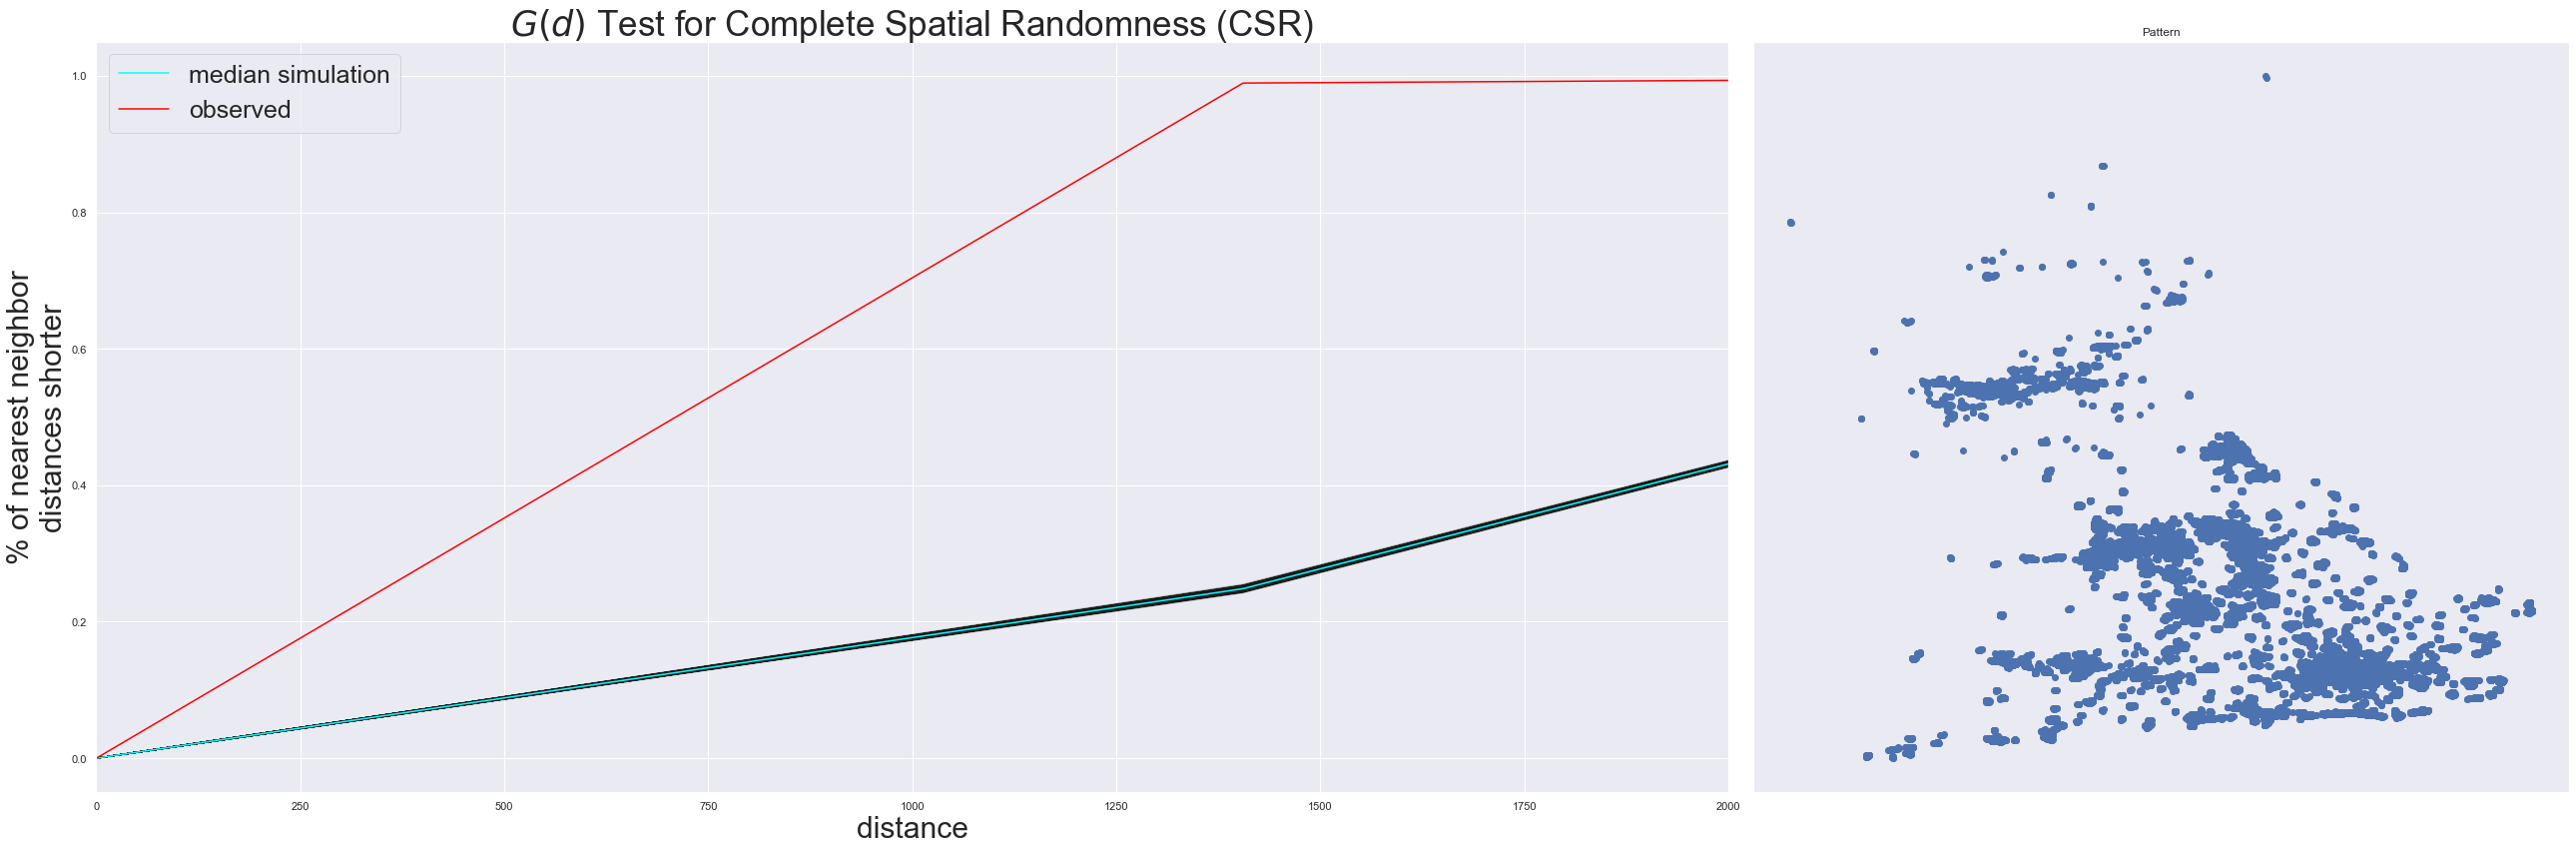

In [131]:
f,ax = plt.subplots(1,2,figsize=(36,12), 
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, numpy.median(g_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance', fontsize=30)
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter', fontsize=30)
ax[0].legend(prop={'size': 25})
ax[0].set_xlim(0,2000)
ax[0].set_title(r"$G(d)$ Test for Complete Spatial Randomness (CSR)", fontsize=35)

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.savefig('g-test.jpeg')
plt.show()

In [132]:
f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)

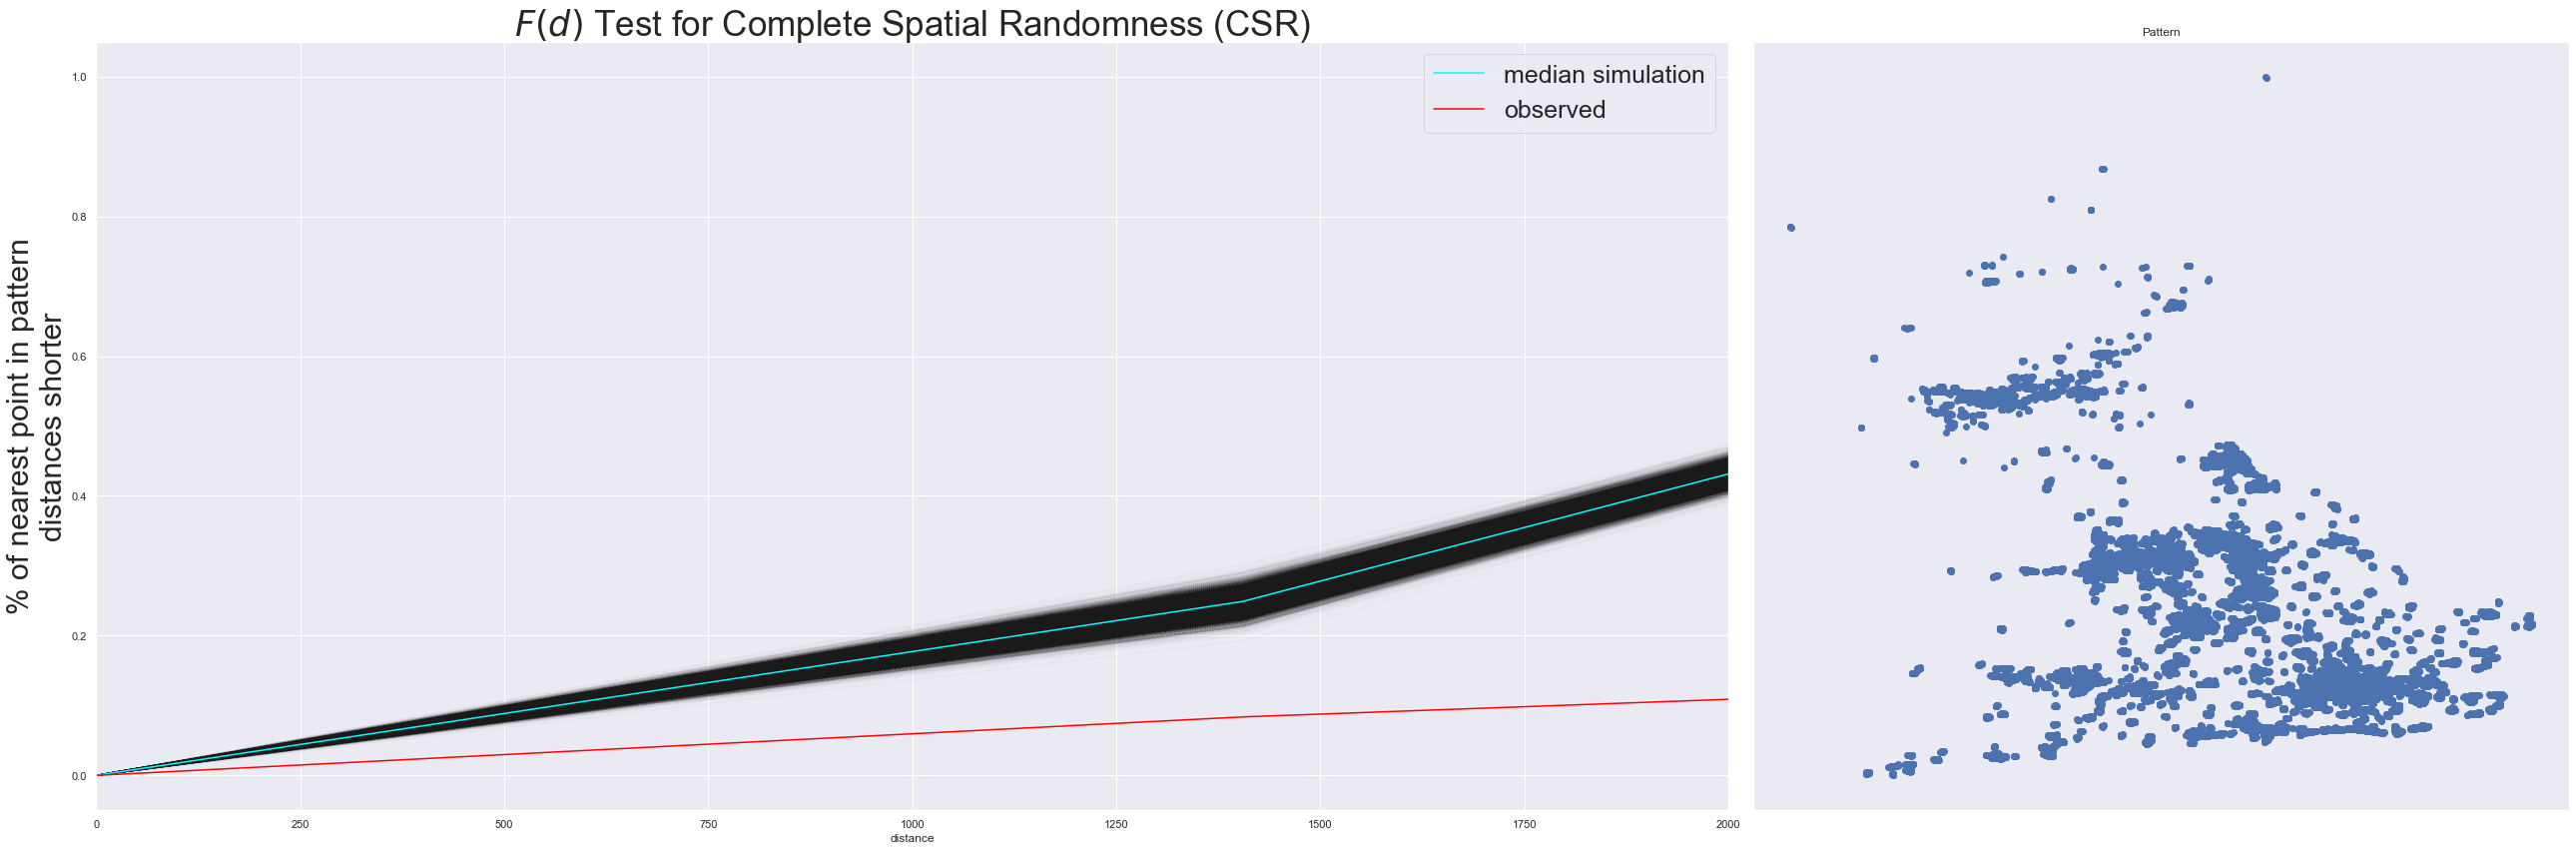

In [133]:
f,ax = plt.subplots(
    1,2,figsize=(36,12), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, numpy.median(f_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter', fontsize=30)
ax[0].legend(prop={'size': 25})
ax[0].set_xlim(0,2000)
ax[0].set_title(r"$F(d)$ Test for Complete Spatial Randomness (CSR)", fontsize=35)

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.savefig('f-test.jpeg')

plt.show()

In [146]:
# Define DBSCAN
clusterer = DBSCAN()
# Fit to our data
clusterer.fit(db3[["x", "y"]])

DBSCAN()

In [147]:
clusterer.core_sample_indices_[:5]

array([  84, 1402, 1431, 1448, 1663], dtype=int64)

In [148]:
lbls = pandas.Series(clusterer.labels_, index=db3.index)

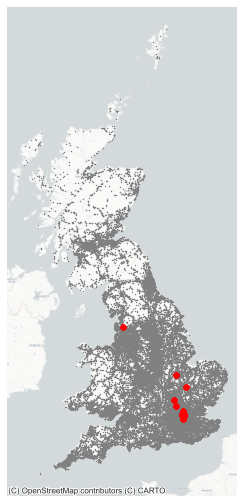

In [149]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Subset points that are not part of any cluster (noise)
noise = db3.loc[lbls==-1, ['x', 'y']]
# Plot noise in grey
ax.scatter(noise['x'], noise['y'], c='grey', s=2, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (tw) and substract from
#      it the index of those that are noise
ax.scatter(db3.loc[db3.index.difference(noise.index), 'x'], \
           db3.loc[db3.index.difference(noise.index), 'y'], \
          c='red', linewidth=0)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In [157]:
# Obtain the number of points 0.032% of the total represents
minp = numpy.round(db3.shape[0] * 0.00015)
minp

18.0

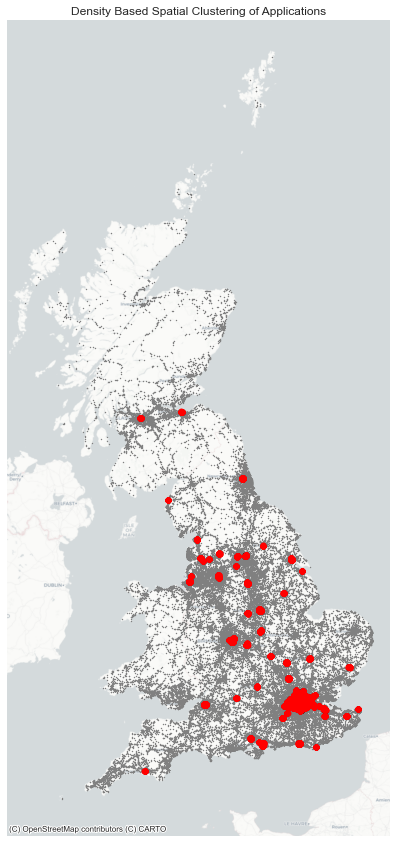

In [159]:
# Rerun DBSCAN
clusterer = DBSCAN(eps=500, min_samples=minp)
clusterer.fit(db3[['x', 'y']])
# Turn labels into a Series
lbls = pandas.Series(clusterer.labels_, index=db3.index)
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(15, 15))
# Subset points that are not part of any cluster (noise)
noise = db3.loc[lbls==-1, ['x', 'y']]
# Plot noise in grey
ax.scatter(noise['x'], noise['y'], c='grey', s=2, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (db3) and substract from
#      it the index of those that are noise
ax.scatter(
    db3.loc[db3.index.difference(noise.index), 'x'],
    db3.loc[db3.index.difference(noise.index), 'y'],
    c='red', 
    linewidth=0
)
# Add basemap
contextily.add_basemap(
    ax, 
    source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.title('Density Based Spatial Clustering of Applications')
plt.savefig('dbscan.jpeg')
plt.show()
